In [200]:
import pandas as pd
import numpy as np

In [201]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [202]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [203]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [204]:
df=pd.read_csv('data_perovskites.csv')

In [205]:
new_data=pd.read_csv('rhombohedral.csv')

In [206]:
en_bl=pd.read_csv('Electronegativity and bond lengths.csv')

In [207]:
val=pd.read_csv('validation data.csv')

In [208]:
#short=pd.read_csv('Paper_data.csv')

In [209]:
#short

In [210]:
#short=short[short['Lowest distortion']!='-']

In [211]:
#short=short[(short['tG'] >= 0.82) & (short['tG'] <= 1.1)]

In [212]:
#short=short[(short['μ'] >= 0.414) & (short['μ'] <= 0.732)]

In [213]:
#short=short[short['Valence A']!='not balanced']
#short=short[short['Valence A']!='element not in BV']

In [214]:
#short

In [215]:
#short.to_csv('short_list.csv')

In [216]:
val['Crystal structure'].value_counts()

orthorhombic    32
tetragonal      23
cubic           12
rhombohedral     4
Name: Crystal structure, dtype: int64

In [217]:
wp1=df.drop(['Formation energy [eV/atom]','Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]','Band gap [eV]'],axis=1)

In [218]:
wp1=wp1[wp1['Lowest distortion']!='-']

In [219]:
wp1['Lowest distortion'].value_counts()*100/5276

cubic           61.656558
orthorhombic    29.814253
rhombohedral     6.122062
tetragonal       2.407127
Name: Lowest distortion, dtype: float64

In [220]:
val

,Compound,rA at 12,rA at 6,rB at 6,EN of A,EN of B,BL of A,BL of B,Crystal structure,Valence of A,Valence of B
0,LaZn1/2Ti1/2O3,1.360,1.03,0.705,1.100,1.595,2.689119,2.011995,orthorhombic,3,3
1,Na1/2K1/2NbO3,1.515,1.20,0.640,0.875,1.600,2.892822,1.955055,orthorhombic,1,5
2,Na1/2Bi1/2TiO3,1.385,0.96,0.660,1.475,1.540,2.637163,1.927849,rhombohedral,2,4
3,Na1/2Bi1/2ZrO3,1.385,0.96,0.720,1.475,1.330,2.637163,2.043778,orthorhombic,2,4
4,K1/2Bi1/2TiO3,1.510,1.14,0.660,1.420,1.540,2.770061,1.927849,tetragonal,2,4
...,...,...,...,...,...,...,...,...,...,...,...
66,Pr(Zn1/2Ti1/2)O3,1.180,0.92,0.705,1.130,1.595,2.645083,2.011995,orthorhombic,3,4
67,Gd(Zn1/2Ti1/2)O3,1.110,0.94,0.675,1.200,1.595,2.571812,2.011995,orthorhombic,2,4
68,Tb(Zn1/2Ti1/2)O3,1.100,0.84,0.675,1.200,1.595,2.557065,2.011995,orthorhombic,3,3
69,Dy(Zn1/2Ti1/2)O3,1.080,0.99,0.675,1.220,1.595,2.550861,2.011995,orthorhombic,2,4


In [221]:
val['Goldschmidt Tolerance']=(val['rA at 12']+1.4)/((2**.5)*(val['rB at 6']+1.4))

In [222]:
val['Octahedral factor']=(val['rB at 6']/1.4)

In [223]:
wp1['Goldschmidt Tolerance']=(wp1['Radius A [ang]']+1.4)/((2**.5)*(wp1['Radius B [ang]']+1.4))

In [224]:
wp1['Octahedral factor']=(wp1['Radius B [ang]']/1.4)

In [225]:
wp1=wp1[(wp1['Goldschmidt Tolerance'] >= 0.82) & (wp1['Goldschmidt Tolerance'] <= 1.1)]

In [226]:
wp1=wp1[(wp1['Octahedral factor'] >= 0.414) & (wp1['Octahedral factor'] <= 0.732)]

In [227]:
wp1['Lowest distortion'].value_counts()* 100/3699

orthorhombic    17.842660
cubic           12.814274
rhombohedral     2.081644
tetragonal       1.081373
Name: Lowest distortion, dtype: float64

In [228]:
wp1=wp1[wp1['Valence A']!='not balanced']

In [229]:
wp1=wp1[wp1['Valence A']!='element not in BV']

In [230]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
81,AgBiO3,Ag,Bi,False,1,5,1.28,0.76,rhombohedral,0.877336,0.542857
107,AgMoO3,Ag,Mo,False,1,5,1.28,0.61,cubic,0.942809,0.435714
109,AgNbO3,Ag,Nb,True,1,5,1.28,0.64,rhombohedral,0.928944,0.457143
122,AgReO3,Ag,Re,False,1,5,1.28,0.58,cubic,0.957094,0.414286
125,AgSbO3,Ag,Sb,True,1,5,1.28,0.60,orthorhombic,0.947523,0.428571
...,...,...,...,...,...,...,...,...,...,...,...
5173,YbTiO3,Yb,Ti,True,2,4,1.14,0.61,orthorhombic,0.893558,0.435714
5177,YbVO3,Yb,V,True,2,4,1.14,0.58,orthorhombic,0.907097,0.414286
5178,YbWO3,Yb,W,False,2,4,1.14,0.66,orthorhombic,0.871870,0.471429
5182,YbZrO3,Yb,Zr,False,2,4,1.14,0.72,orthorhombic,0.847194,0.514286


In [231]:
wp1= pd.concat([wp1,pd.get_dummies(wp1['Valence A'])],axis=1)

In [232]:
val= pd.concat([val,pd.get_dummies(val['Valence of A'])],axis=1)

In [233]:
wp1['Valence A']=pd.to_numeric(wp1['Valence A'],downcast='float')
wp1['Valence B']=pd.to_numeric(wp1['Valence B'],downcast='float')

In [234]:
val['Valence A']=pd.to_numeric(val['Valence of A'],downcast='float')
val['Valence B']=pd.to_numeric(val['Valence of B'],downcast='float')

In [235]:
wp1['rA/rB']=wp1['Radius A [ang]']/wp1['Radius B [ang]']

In [236]:
val['rA/rB']=val['rA at 12']/val['rB at 6']

In [237]:
wp1['ln rA/rB']=np.log(wp1['rA/rB'])

In [238]:
val['ln rA/rB']=np.log(val['rA/rB'])

In [239]:
wp1['rA/rB'].describe()

count    675.000000
mean       1.846269
std        0.307426
min        1.387755
25%        1.586853
50%        1.776316
75%        2.053640
max        2.827586
Name: rA/rB, dtype: float64

In [240]:
val['rA/rB'].describe()

count    71.000000
mean      1.963910
std       0.243992
min       1.597122
25%       1.794294
50%       1.939759
75%       2.113991
max       2.625000
Name: rA/rB, dtype: float64

In [241]:
wp1['tN']=(1.4/wp1['Radius B [ang]'])-wp1['Valence A']*(wp1['Valence A']-(wp1['rA/rB']/wp1['ln rA/rB']))

In [242]:
val['tN']=(1.4/val['rB at 6'])-val['Valence A']*(val['Valence A']-(val['rA/rB']/val['ln rA/rB']))

In [243]:
wp1['tN'].describe()

count    675.000000
mean       3.468194
std        1.289246
min       -2.238066
25%        2.824026
50%        3.821751
75%        4.229004
max        5.863777
Name: tN, dtype: float64

In [244]:
val['tN'].describe()

count    71.000000
mean      3.733581
std       0.494429
min       1.759000
25%       3.525184
50%       3.715225
75%       3.940358
max       4.882532
Name: tN, dtype: float64

In [245]:
new_data=new_data[new_data['Valence A']!='not balanced']
new_data=new_data[new_data['Valence A']!='element not in BV']

In [246]:
new_data

,ABO3,A,B,Valence A,Valence B,Lowest distortion,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],tG,tR,Octahedral factor,VA,VB,VA/VB
76,AgAsO3,Ag,As,1,5,tetragonal,1.28,0.95,0.46,1.018995909,0.923839,0.328571429,45.369932,8.579808,5.287989
78,AgBO3,Ag,B,3,3,cubic,0.75,0.95,0.27,0.910484547,1.358334,0.192857143,23.424975,6.209951,3.772168
81,AgBiO3,Ag,Bi,1,5,rhombohedral,1.28,0.95,0.76,0.877468699,0.911822,0.542857143,45.369932,13.436928,3.376511
86,AgCrO3,Ag,Cr,1,5,orthorhombic,1.28,0.95,0.49,1.002821371,0.921930,0.35,45.369932,9.001692,5.040156
100,AgIrO3,Ag,Ir,1,5,rhombohedral,1.28,0.95,0.57,0.96209766,0.917682,0.407142857,45.369932,10.193831,4.450725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,1,5,cubic,0.89,0.72,0.64,0.793881909,0.892546,0.457142857,28.305459,11.319552,2.500581
5319,ZrTiO3,Zr,Ti,2,4,cubic,0.89,0.72,0.61,0.805730893,0.892978,0.435714286,28.305459,10.827468,2.614227
5322,ZrUO3,Zr,U,1,5,orthorhombic,0.89,0.72,0.76,0.749777359,0.892076,0.542857143,28.305459,13.436928,2.106542
5323,ZrVO3,Zr,V,1,5,cubic,0.89,0.72,0.54,0.834803657,0.894528,0.385714286,28.305459,9.735179,2.907544


In [247]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','VA/VB','tR','VA','VB']]

In [248]:
wp1=pd.merge(wp1,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [249]:
en_bl.drop(['A','B'],axis=1)

,ABO3,EN of A,EN of B,Bond length of A,Bond length of B
0,Ac2O3,1.10,1.10,0.00000,0.000000
1,AcAgO3,1.10,1.93,0.00000,2.488353
2,AcAlO3,1.10,1.61,0.00000,1.892894
3,AcAsO3,1.10,2.18,0.00000,1.932227
4,AcAuO3,1.10,2.54,0.00000,2.313698
...,...,...,...,...,...
5324,ZrWO3,1.33,2.36,2.38342,1.745600
5325,ZrYO3,1.33,1.22,2.38342,2.235124
5326,ZrYbO3,1.33,1.10,2.38342,2.223981
5327,ZrZnO3,1.33,1.65,2.38342,2.096141


In [250]:
wp1=pd.merge(wp1,en_bl,how='left',left_on='Chemical formula',right_on='ABO3')

In [251]:
wp1

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B
0,AgBiO3,Ag,Bi,False,1.0,5.0,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655
1,AgMoO3,Ag,Mo,False,1.0,5.0,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300
2,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055
3,AgReO3,Ag,Re,False,1.0,5.0,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971
4,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849
671,YbVO3,Yb,V,True,2.0,4.0,1.14,0.58,orthorhombic,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,YbVO3,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,YbVO3,Yb,V,1.10,1.63,2.519261,1.758039
672,YbWO3,Yb,W,False,2.0,4.0,1.14,0.66,orthorhombic,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,YbWO3,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,YbWO3,Yb,W,1.10,2.36,2.519261,1.745600
673,YbZrO3,Yb,Zr,False,2.0,4.0,1.14,0.72,orthorhombic,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,YbZrO3,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,YbZrO3,Yb,Zr,1.10,1.33,2.519261,2.043778


In [252]:
wp1['Bond length of A'].value_counts()

2.689119    43
2.577786    42
2.514402    41
2.617634    39
2.675988    28
2.611965    27
2.645083    26
2.546312    25
2.571812    23
2.942999    22
2.519261    22
2.550861    22
2.659877    22
2.768351    22
2.568546    21
2.648078    21
2.582926    20
2.536253    20
2.411516    20
2.557065    20
2.344467    20
2.566449    19
2.500930    16
2.645968    16
2.531967    15
2.393444     9
2.472899     9
2.761453     8
2.759925     8
3.025719     7
3.112266     6
2.392362     5
2.290644     3
2.453212     3
3.300176     3
2.233563     1
2.375479     1
Name: Bond length of A, dtype: int64

In [253]:
wp1

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B
0,AgBiO3,Ag,Bi,False,1.0,5.0,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655
1,AgMoO3,Ag,Mo,False,1.0,5.0,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300
2,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055
3,AgReO3,Ag,Re,False,1.0,5.0,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971
4,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849
671,YbVO3,Yb,V,True,2.0,4.0,1.14,0.58,orthorhombic,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,YbVO3,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,YbVO3,Yb,V,1.10,1.63,2.519261,1.758039
672,YbWO3,Yb,W,False,2.0,4.0,1.14,0.66,orthorhombic,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,YbWO3,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,YbWO3,Yb,W,1.10,2.36,2.519261,1.745600
673,YbZrO3,Yb,Zr,False,2.0,4.0,1.14,0.72,orthorhombic,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,YbZrO3,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,YbZrO3,Yb,Zr,1.10,1.33,2.519261,2.043778


In [254]:
#wp1['New Tolerance Factor']=((wp1['rA at 6 [ang]']/wp1['rA at 12 [ang]'])/3)*((wp1['Radius A [ang]']+1.4)/(wp1['Radius B [ang]']+1.4))*((wp1['Radius B [ang]']+1.4)/1.4*(2**0.5))*((wp1['Radius A [ang]']+1.4)/1.4*(2**0.5))

In [255]:
wp1['EN diff with radius']=((wp1['Radius B [ang]']/1.4)*(wp1['EN of B']-3.44)+(wp1['Radius A [ang]']/1.4)*(wp1['EN of A']-6.88))/2

In [256]:
val.columns

Index([             'Compound',              'rA at 12',
                     'rA at 6',               'rB at 6',
                     'EN of A',               'EN of B',
                     'BL of A',               'BL of B',
           'Crystal structure',          'Valence of A',
                'Valence of B', 'Goldschmidt Tolerance',
           'Octahedral factor',                       1,
                             2,                       3,
                   'Valence A',             'Valence B',
                       'rA/rB',              'ln rA/rB',
                          'tN'],
      dtype='object')

In [257]:
val['EN diff with radius']=((val['rB at 6']/1.4)*(val['EN of B']-3.44)+(val['rA at 12']/1.4)*(val['EN of A']-6.88))/2

In [258]:
#wp1.drop(['ABO3_x','Radius A [ang]','Radius B [ang]','VA/VB','tR','VA','VB','ABO3_y','A_y','B_y'],axis=1,inplace=True)

In [259]:
#wp1.rename(columns={'B_x':'B','A_x':'A',"Goldschmidt Tolerance": "tG", "Octahedral factor": "μ",'EN diff with radius':'ΔENR','Bond length of B':'l(B-O)','Bond length of A':'l(A-O)','EN of B':'EN(B)','EN of A':'EN(A)','rA at 6 [ang]':'r(AVI)','rA at 12 [ang]':'r(AXII)','rB at 6 [ang]':'r(BVI)'},inplace=True)

In [260]:
wp1

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,AgBiO3,Ag,Bi,False,1.0,5.0,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655,-2.648286
1,AgMoO3,Ag,Mo,False,1.0,5.0,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300,-2.541714
2,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,-2.683429
3,AgReO3,Ag,Re,False,1.0,5.0,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971,-2.581857
4,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,-2.560714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849,-2.767214
671,YbVO3,Yb,V,True,2.0,4.0,1.14,0.58,orthorhombic,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,YbVO3,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,YbVO3,Yb,V,1.10,1.63,2.519261,1.758039,-2.728214
672,YbWO3,Yb,W,False,2.0,4.0,1.14,0.66,orthorhombic,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,YbWO3,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,YbWO3,Yb,W,1.10,2.36,2.519261,1.745600,-2.607857
673,YbZrO3,Yb,Zr,False,2.0,4.0,1.14,0.72,orthorhombic,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,YbZrO3,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,YbZrO3,Yb,Zr,1.10,1.33,2.519261,2.043778,-2.895857


In [261]:
#wp1.to_csv('Draft data.csv')

In [262]:
wp1['1'].dtypes

dtype('uint8')

In [263]:
val

,Compound,rA at 12,rA at 6,rB at 6,EN of A,EN of B,BL of A,BL of B,Crystal structure,Valence of A,Valence of B,Goldschmidt Tolerance,Octahedral factor,1,2,3,Valence A,Valence B,rA/rB,ln rA/rB,tN,EN diff with radius
0,LaZn1/2Ti1/2O3,1.360,1.03,0.705,1.100,1.595,2.689119,2.011995,orthorhombic,3,3,0.927133,0.503571,0,0,1,3.0,3.0,1.929078,0.657042,1.793826,-3.271973
1,Na1/2K1/2NbO3,1.515,1.20,0.640,0.875,1.600,2.892822,1.955055,orthorhombic,1,5,1.010400,0.457143,1,0,0,1.0,5.0,2.367188,0.861703,3.934605,-3.669705
2,Na1/2Bi1/2TiO3,1.385,0.96,0.660,1.475,1.540,2.637163,1.927849,rhombohedral,2,4,0.955967,0.471429,0,1,0,2.0,4.0,2.098485,0.741216,3.783491,-3.121402
3,Na1/2Bi1/2ZrO3,1.385,0.96,0.720,1.475,1.330,2.637163,2.043778,orthorhombic,2,4,0.928912,0.514286,0,1,0,2.0,4.0,1.923611,0.654204,3.825211,-3.216116
4,K1/2Bi1/2TiO3,1.510,1.14,0.660,1.420,1.540,2.770061,1.927849,tetragonal,2,4,0.998874,0.471429,0,1,0,2.0,4.0,2.287879,0.827625,3.649993,-3.392357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Pr(Zn1/2Ti1/2)O3,1.180,0.92,0.705,1.130,1.595,2.645083,2.011995,orthorhombic,3,4,0.866668,0.503571,0,0,1,3.0,4.0,1.673759,0.515072,2.734506,-2.887759
67,Gd(Zn1/2Ti1/2)O3,1.110,0.94,0.675,1.200,1.595,2.571812,2.011995,orthorhombic,2,4,0.855344,0.482143,0,1,0,2.0,4.0,1.644444,0.497403,4.686200,-2.696491
68,Tb(Zn1/2Ti1/2)O3,1.100,0.84,0.675,1.200,1.595,2.557065,2.011995,orthorhombic,3,3,0.851936,0.482143,0,0,1,3.0,3.0,1.629630,0.488353,3.085052,-2.676205
69,Dy(Zn1/2Ti1/2)O3,1.080,0.99,0.675,1.220,1.595,2.550861,2.011995,orthorhombic,2,4,0.845120,0.482143,0,1,0,2.0,4.0,1.600000,0.470004,4.882532,-2.627920


In [264]:
#draft=pd.read_csv('Draft data.csv')

In [265]:
#draft

In [266]:
#temp=wp1[['Chemical formula','tN']]

In [267]:
#temp2=pd.merge(draft,temp,how='left',on='Chemical formula')

In [268]:
#temp2

In [269]:
#temp2.replace([np.inf, -np.inf], np.nan,inplace=True)

In [270]:
#temp2['tN'].fillna('-',inplace=True)

In [271]:
#temp2.to_csv('Paper_data.csv')

In [272]:
categorical = wp1.select_dtypes(include=[np.object,np.bool])

numeric = wp1.select_dtypes(include=[np.int,np.float32,np.float,np.int32,np.uint8])
numeric_cols = numeric.columns

In [273]:
categorical

,Chemical formula,A_x,B_x,In literature,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgBiO3,Ag,Bi,False,rhombohedral,AgBiO3,AgBiO3,Ag,Bi
1,AgMoO3,Ag,Mo,False,cubic,AgMoO3,AgMoO3,Ag,Mo
2,AgNbO3,Ag,Nb,True,rhombohedral,AgNbO3,AgNbO3,Ag,Nb
3,AgReO3,Ag,Re,False,cubic,AgReO3,AgReO3,Ag,Re
4,AgSbO3,Ag,Sb,True,orthorhombic,AgSbO3,AgSbO3,Ag,Sb
...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,orthorhombic,YbTiO3,YbTiO3,Yb,Ti
671,YbVO3,Yb,V,True,orthorhombic,YbVO3,YbVO3,Yb,V
672,YbWO3,Yb,W,False,orthorhombic,YbWO3,YbWO3,Yb,W
673,YbZrO3,Yb,Zr,False,orthorhombic,YbZrO3,YbZrO3,Yb,Zr


In [274]:
numeric

,Valence A,Valence B,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,1.0,5.0,1.28,0.76,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,-2.648286
1,1.0,5.0,1.28,0.61,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,1.93,2.16,2.761453,1.789300,-2.541714
2,1.0,5.0,1.28,0.64,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,1.93,1.60,2.761453,1.955055,-2.683429
3,1.0,5.0,1.28,0.58,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,1.93,1.90,2.761453,1.987971,-2.581857
4,1.0,5.0,1.28,0.60,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,1.93,2.05,2.761453,2.075849,-2.560714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.61,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,1.10,1.54,2.519261,1.927849,-2.767214
671,2.0,4.0,1.14,0.58,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,1.10,1.63,2.519261,1.758039,-2.728214
672,2.0,4.0,1.14,0.66,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,1.10,2.36,2.519261,1.745600,-2.607857
673,2.0,4.0,1.14,0.72,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,1.10,1.33,2.519261,2.043778,-2.895857


In [275]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Valence A,Valence B,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
Valence A,1.00,-1.00,-0.33,0.11,-0.39,0.11,-0.66,-0.47,0.71,0.45,-0.38,-0.37,-0.70,-0.33,-0.30,0.11,-0.40,-0.09,-0.35,0.11,-0.11,-0.05,-0.32,0.07,0.20
Valence B,-1.00,1.00,0.33,-0.11,0.39,-0.11,0.66,0.47,-0.71,-0.45,0.38,0.37,0.70,0.33,0.30,-0.11,0.40,0.09,0.35,-0.11,0.11,0.05,0.32,-0.07,-0.20
Radius A [ang],-0.33,0.33,1.00,0.32,0.78,0.32,0.18,0.23,-0.32,-0.06,0.65,0.63,-0.03,1.00,0.72,0.32,0.79,0.05,1.00,0.32,-0.10,-0.13,0.76,0.19,-0.88
Radius B [ang],0.11,-0.11,0.32,1.00,-0.34,1.00,-0.15,0.04,0.02,0.06,-0.50,-0.53,0.16,0.32,0.13,1.00,-0.33,-0.15,0.30,1.00,-0.04,-0.52,0.16,0.65,-0.50
Goldschmidt Tolerance,-0.39,0.39,0.78,-0.34,1.00,-0.34,0.27,0.20,-0.33,-0.11,0.98,0.97,-0.14,0.78,0.63,-0.34,1.00,0.14,0.79,-0.34,-0.07,0.21,0.65,-0.24,-0.55
Octahedral factor,0.11,-0.11,0.32,1.00,-0.34,1.00,-0.15,0.04,0.02,0.06,-0.50,-0.53,0.16,0.32,0.13,1.00,-0.33,-0.15,0.30,1.00,-0.04,-0.52,0.16,0.65,-0.50
1,-0.66,0.66,0.18,-0.15,0.27,-0.15,1.00,-0.30,-0.29,-0.07,0.27,0.26,0.18,0.18,0.24,-0.15,0.29,0.16,0.21,-0.15,0.06,0.06,0.28,-0.11,-0.10
2,-0.47,0.47,0.23,0.04,0.20,0.04,-0.30,1.00,-0.75,-0.18,0.17,0.18,0.53,0.23,0.11,0.04,0.19,-0.08,0.22,0.05,0.08,-0.01,0.08,0.02,-0.16
3,0.71,-0.71,-0.32,0.02,-0.33,0.02,-0.29,-0.75,1.00,-0.17,-0.30,-0.29,-0.39,-0.32,-0.23,0.02,-0.33,0.01,-0.32,0.02,-0.11,-0.03,-0.23,0.06,0.20
4,0.45,-0.45,-0.06,0.06,-0.11,0.06,-0.07,-0.18,-0.17,1.00,-0.11,-0.11,-0.67,-0.06,-0.08,0.06,-0.11,-0.06,-0.07,0.06,-0.01,-0.01,-0.08,-0.03,0.04


In [276]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [277]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [278]:
test=wp1

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [280]:
le_target = LabelEncoder()
test['Lowest distortion']= le_target.fit_transform(test['Lowest distortion'])

In [281]:
categorical

,Chemical formula,A_x,B_x,In literature,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgBiO3,Ag,Bi,False,rhombohedral,AgBiO3,AgBiO3,Ag,Bi
1,AgMoO3,Ag,Mo,False,cubic,AgMoO3,AgMoO3,Ag,Mo
2,AgNbO3,Ag,Nb,True,rhombohedral,AgNbO3,AgNbO3,Ag,Nb
3,AgReO3,Ag,Re,False,cubic,AgReO3,AgReO3,Ag,Re
4,AgSbO3,Ag,Sb,True,orthorhombic,AgSbO3,AgSbO3,Ag,Sb
...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,orthorhombic,YbTiO3,YbTiO3,Yb,Ti
671,YbVO3,Yb,V,True,orthorhombic,YbVO3,YbVO3,Yb,V
672,YbWO3,Yb,W,False,orthorhombic,YbWO3,YbWO3,Yb,W
673,YbZrO3,Yb,Zr,False,orthorhombic,YbZrO3,YbZrO3,Yb,Zr


In [282]:
val

,Compound,rA at 12,rA at 6,rB at 6,EN of A,EN of B,BL of A,BL of B,Crystal structure,Valence of A,Valence of B,Goldschmidt Tolerance,Octahedral factor,1,2,3,Valence A,Valence B,rA/rB,ln rA/rB,tN,EN diff with radius
0,LaZn1/2Ti1/2O3,1.360,1.03,0.705,1.100,1.595,2.689119,2.011995,orthorhombic,3,3,0.927133,0.503571,0,0,1,3.0,3.0,1.929078,0.657042,1.793826,-3.271973
1,Na1/2K1/2NbO3,1.515,1.20,0.640,0.875,1.600,2.892822,1.955055,orthorhombic,1,5,1.010400,0.457143,1,0,0,1.0,5.0,2.367188,0.861703,3.934605,-3.669705
2,Na1/2Bi1/2TiO3,1.385,0.96,0.660,1.475,1.540,2.637163,1.927849,rhombohedral,2,4,0.955967,0.471429,0,1,0,2.0,4.0,2.098485,0.741216,3.783491,-3.121402
3,Na1/2Bi1/2ZrO3,1.385,0.96,0.720,1.475,1.330,2.637163,2.043778,orthorhombic,2,4,0.928912,0.514286,0,1,0,2.0,4.0,1.923611,0.654204,3.825211,-3.216116
4,K1/2Bi1/2TiO3,1.510,1.14,0.660,1.420,1.540,2.770061,1.927849,tetragonal,2,4,0.998874,0.471429,0,1,0,2.0,4.0,2.287879,0.827625,3.649993,-3.392357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Pr(Zn1/2Ti1/2)O3,1.180,0.92,0.705,1.130,1.595,2.645083,2.011995,orthorhombic,3,4,0.866668,0.503571,0,0,1,3.0,4.0,1.673759,0.515072,2.734506,-2.887759
67,Gd(Zn1/2Ti1/2)O3,1.110,0.94,0.675,1.200,1.595,2.571812,2.011995,orthorhombic,2,4,0.855344,0.482143,0,1,0,2.0,4.0,1.644444,0.497403,4.686200,-2.696491
68,Tb(Zn1/2Ti1/2)O3,1.100,0.84,0.675,1.200,1.595,2.557065,2.011995,orthorhombic,3,3,0.851936,0.482143,0,0,1,3.0,3.0,1.629630,0.488353,3.085052,-2.676205
69,Dy(Zn1/2Ti1/2)O3,1.080,0.99,0.675,1.220,1.595,2.550861,2.011995,orthorhombic,2,4,0.845120,0.482143,0,1,0,2.0,4.0,1.600000,0.470004,4.882532,-2.627920


In [283]:
numeric

,Valence A,Valence B,Radius A _ang_,Radius B _ang_,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,rA at 12 _ang_,rA at 6 _ang_,rB at 6 _ang_,VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,1.0,5.0,1.28,0.76,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,-2.648286
1,1.0,5.0,1.28,0.61,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,1.93,2.16,2.761453,1.789300,-2.541714
2,1.0,5.0,1.28,0.64,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,1.93,1.60,2.761453,1.955055,-2.683429
3,1.0,5.0,1.28,0.58,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,1.93,1.90,2.761453,1.987971,-2.581857
4,1.0,5.0,1.28,0.60,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,1.93,2.05,2.761453,2.075849,-2.560714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.61,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,1.10,1.54,2.519261,1.927849,-2.767214
671,2.0,4.0,1.14,0.58,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,1.10,1.63,2.519261,1.758039,-2.728214
672,2.0,4.0,1.14,0.66,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,1.10,2.36,2.519261,1.745600,-2.607857
673,2.0,4.0,1.14,0.72,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,1.10,1.33,2.519261,2.043778,-2.895857


In [284]:
X=numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','tR','VA','VB','rB at 6 _ang_','4','Valence A','Valence B','rA/rB','ln rA/rB'],axis=1)
#X=numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','tR','VA','VB','rB at 6 _ang_'],axis=1)

y=test['Lowest distortion']

In [285]:
X

,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,0.877336,0.542857,1,0,0,4.072914,1.28,0.95,1.93,2.02,2.761453,2.215655,-2.648286
1,0.942809,0.435714,1,0,0,4.126280,1.28,0.95,1.93,2.16,2.761453,1.789300,-2.541714
2,0.928944,0.457143,1,0,0,4.072890,1.28,0.95,1.93,1.60,2.761453,1.955055,-2.683429
3,0.957094,0.414286,1,0,0,4.201732,1.28,0.95,1.93,1.90,2.761453,1.987971,-2.581857
4,0.947523,0.428571,1,0,0,4.148925,1.28,0.95,1.93,2.05,2.761453,2.075849,-2.560714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.893558,0.435714,0,1,0,4.272306,1.14,0.95,1.10,1.54,2.519261,1.927849,-2.767214
671,0.907097,0.414286,0,1,0,4.231037,1.14,0.95,1.10,1.63,2.519261,1.758039,-2.728214
672,0.871870,0.471429,0,1,0,4.441924,1.14,0.95,1.10,2.36,2.519261,1.745600,-2.607857
673,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-2.895857


In [286]:
X.rename(columns={'rA at 12 _ang_':'rA at 12','rA at 6 _ang_':'rA at 6','Bond length of A':'BL of A','Bond length of B':'BL of B'},inplace=True)

In [287]:
#X.rename(columns={"Goldschmidt Tolerance": "tG", "Octahedral factor": "μ",'EN diff with radius':'ΔENR','Bond length of B':'l(B-O)','Bond length of A':'l(A-O)','EN of B':'EN(B)','EN of A':'EN(A)','rA at 6 _ang_':'r(A$_{VI}$)','rA at 12 _ang_':'r(A$_{XII}$)','1':'v(A$^{1+}$)','2':'v(A$^{2+}$)','3':'v(A$^{3+}$)','tN':'τ'},inplace=True)

In [288]:
val['Crystal structure']= le_target.fit_transform(val['Crystal structure'])

In [289]:
val

,Compound,rA at 12,rA at 6,rB at 6,EN of A,EN of B,BL of A,BL of B,Crystal structure,Valence of A,Valence of B,Goldschmidt Tolerance,Octahedral factor,1,2,3,Valence A,Valence B,rA/rB,ln rA/rB,tN,EN diff with radius
0,LaZn1/2Ti1/2O3,1.360,1.03,0.705,1.100,1.595,2.689119,2.011995,1,3,3,0.927133,0.503571,0,0,1,3.0,3.0,1.929078,0.657042,1.793826,-3.271973
1,Na1/2K1/2NbO3,1.515,1.20,0.640,0.875,1.600,2.892822,1.955055,1,1,5,1.010400,0.457143,1,0,0,1.0,5.0,2.367188,0.861703,3.934605,-3.669705
2,Na1/2Bi1/2TiO3,1.385,0.96,0.660,1.475,1.540,2.637163,1.927849,2,2,4,0.955967,0.471429,0,1,0,2.0,4.0,2.098485,0.741216,3.783491,-3.121402
3,Na1/2Bi1/2ZrO3,1.385,0.96,0.720,1.475,1.330,2.637163,2.043778,1,2,4,0.928912,0.514286,0,1,0,2.0,4.0,1.923611,0.654204,3.825211,-3.216116
4,K1/2Bi1/2TiO3,1.510,1.14,0.660,1.420,1.540,2.770061,1.927849,3,2,4,0.998874,0.471429,0,1,0,2.0,4.0,2.287879,0.827625,3.649993,-3.392357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Pr(Zn1/2Ti1/2)O3,1.180,0.92,0.705,1.130,1.595,2.645083,2.011995,1,3,4,0.866668,0.503571,0,0,1,3.0,4.0,1.673759,0.515072,2.734506,-2.887759
67,Gd(Zn1/2Ti1/2)O3,1.110,0.94,0.675,1.200,1.595,2.571812,2.011995,1,2,4,0.855344,0.482143,0,1,0,2.0,4.0,1.644444,0.497403,4.686200,-2.696491
68,Tb(Zn1/2Ti1/2)O3,1.100,0.84,0.675,1.200,1.595,2.557065,2.011995,1,3,3,0.851936,0.482143,0,0,1,3.0,3.0,1.629630,0.488353,3.085052,-2.676205
69,Dy(Zn1/2Ti1/2)O3,1.080,0.99,0.675,1.220,1.595,2.550861,2.011995,1,2,4,0.845120,0.482143,0,1,0,2.0,4.0,1.600000,0.470004,4.882532,-2.627920


In [290]:
X.columns

Index(['Goldschmidt Tolerance', 'Octahedral factor', '1', '2', '3', 'tN',
       'rA at 12', 'rA at 6', 'EN of A', 'EN of B', 'BL of A', 'BL of B',
       'EN diff with radius'],
      dtype='object')

In [291]:
X_validation=val.drop(['rB at 6','Compound','Crystal structure','Valence of A','Valence of B','Valence A','Valence B','rA/rB','ln rA/rB'],axis=1)
y_validation=val['Crystal structure']

In [292]:
X_validation.columns

Index([             'rA at 12',               'rA at 6',
                     'EN of A',               'EN of B',
                     'BL of A',               'BL of B',
       'Goldschmidt Tolerance',     'Octahedral factor',
                             1,                       2,
                             3,                    'tN',
         'EN diff with radius'],
      dtype='object')

In [293]:
X_validation= X_validation[['Goldschmidt Tolerance', 'Octahedral factor', 1,2,3,'tN','rA at 12','rA at 6','EN of A','EN of B','BL of A','BL of B','EN diff with radius']]

In [294]:
X

,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12,rA at 6,EN of A,EN of B,BL of A,BL of B,EN diff with radius
0,0.877336,0.542857,1,0,0,4.072914,1.28,0.95,1.93,2.02,2.761453,2.215655,-2.648286
1,0.942809,0.435714,1,0,0,4.126280,1.28,0.95,1.93,2.16,2.761453,1.789300,-2.541714
2,0.928944,0.457143,1,0,0,4.072890,1.28,0.95,1.93,1.60,2.761453,1.955055,-2.683429
3,0.957094,0.414286,1,0,0,4.201732,1.28,0.95,1.93,1.90,2.761453,1.987971,-2.581857
4,0.947523,0.428571,1,0,0,4.148925,1.28,0.95,1.93,2.05,2.761453,2.075849,-2.560714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.893558,0.435714,0,1,0,4.272306,1.14,0.95,1.10,1.54,2.519261,1.927849,-2.767214
671,0.907097,0.414286,0,1,0,4.231037,1.14,0.95,1.10,1.63,2.519261,1.758039,-2.728214
672,0.871870,0.471429,0,1,0,4.441924,1.14,0.95,1.10,2.36,2.519261,1.745600,-2.607857
673,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-2.895857


In [295]:
X_validation

,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12,rA at 6,EN of A,EN of B,BL of A,BL of B,EN diff with radius
0,0.927133,0.503571,0,0,1,1.793826,1.360,1.03,1.100,1.595,2.689119,2.011995,-3.271973
1,1.010400,0.457143,1,0,0,3.934605,1.515,1.20,0.875,1.600,2.892822,1.955055,-3.669705
2,0.955967,0.471429,0,1,0,3.783491,1.385,0.96,1.475,1.540,2.637163,1.927849,-3.121402
3,0.928912,0.514286,0,1,0,3.825211,1.385,0.96,1.475,1.330,2.637163,2.043778,-3.216116
4,0.998874,0.471429,0,1,0,3.649993,1.510,1.14,1.420,1.540,2.770061,1.927849,-3.392357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.866668,0.503571,0,0,1,2.734506,1.180,0.92,1.130,1.595,2.645083,2.011995,-2.887759
67,0.855344,0.482143,0,1,0,4.686200,1.110,0.94,1.200,1.595,2.571812,2.011995,-2.696491
68,0.851936,0.482143,0,0,1,3.085052,1.100,0.84,1.200,1.595,2.557065,2.011995,-2.676205
69,0.845120,0.482143,0,1,0,4.882532,1.080,0.99,1.220,1.595,2.550861,2.011995,-2.627920


In [296]:
y_validation.value_counts()

1    32
3    23
0    12
2     4
Name: Crystal structure, dtype: int64

In [297]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12,rA at 6,EN of A,EN of B,BL of A,BL of B,EN diff with radius
Goldschmidt Tolerance,1.00,-0.34,0.27,0.20,-0.33,-0.14,0.78,0.63,-0.07,0.21,0.65,-0.24,-0.55
Octahedral factor,-0.34,1.00,-0.15,0.04,0.02,0.16,0.32,0.13,-0.04,-0.52,0.16,0.65,-0.50
1,0.27,-0.15,1.00,-0.30,-0.29,0.18,0.18,0.24,0.06,0.06,0.28,-0.11,-0.10
2,0.20,0.04,-0.30,1.00,-0.75,0.53,0.23,0.11,0.08,-0.01,0.08,0.02,-0.16
3,-0.33,0.02,-0.29,-0.75,1.00,-0.39,-0.32,-0.23,-0.11,-0.03,-0.23,0.06,0.20
tN,-0.14,0.16,0.18,0.53,-0.39,1.00,-0.03,0.02,0.10,-0.11,-0.01,0.12,0.01
rA at 12,0.78,0.32,0.18,0.23,-0.32,-0.03,1.00,0.72,-0.10,-0.13,0.76,0.19,-0.88
rA at 6,0.63,0.13,0.24,0.11,-0.23,0.02,0.72,1.00,-0.33,-0.04,0.85,0.06,-0.72
EN of A,-0.07,-0.04,0.06,0.08,-0.11,0.10,-0.10,-0.33,1.00,-0.01,-0.38,-0.02,0.46
EN of B,0.21,-0.52,0.06,-0.01,-0.03,-0.11,-0.13,-0.04,-0.01,1.00,-0.05,-0.37,0.37


[Text(0.5, 0, 'Goldschmidt Tolerance'),
 Text(1.5, 0, 'Octahedral factor'),
 Text(2.5, 0, '1'),
 Text(3.5, 0, '2'),
 Text(4.5, 0, '3'),
 Text(5.5, 0, 'tN'),
 Text(6.5, 0, 'rA at 12'),
 Text(7.5, 0, 'rA at 6'),
 Text(8.5, 0, 'EN of A'),
 Text(9.5, 0, 'EN of B'),
 Text(10.5, 0, 'BL of A'),
 Text(11.5, 0, 'BL of B'),
 Text(12.5, 0, 'EN diff with radius')]

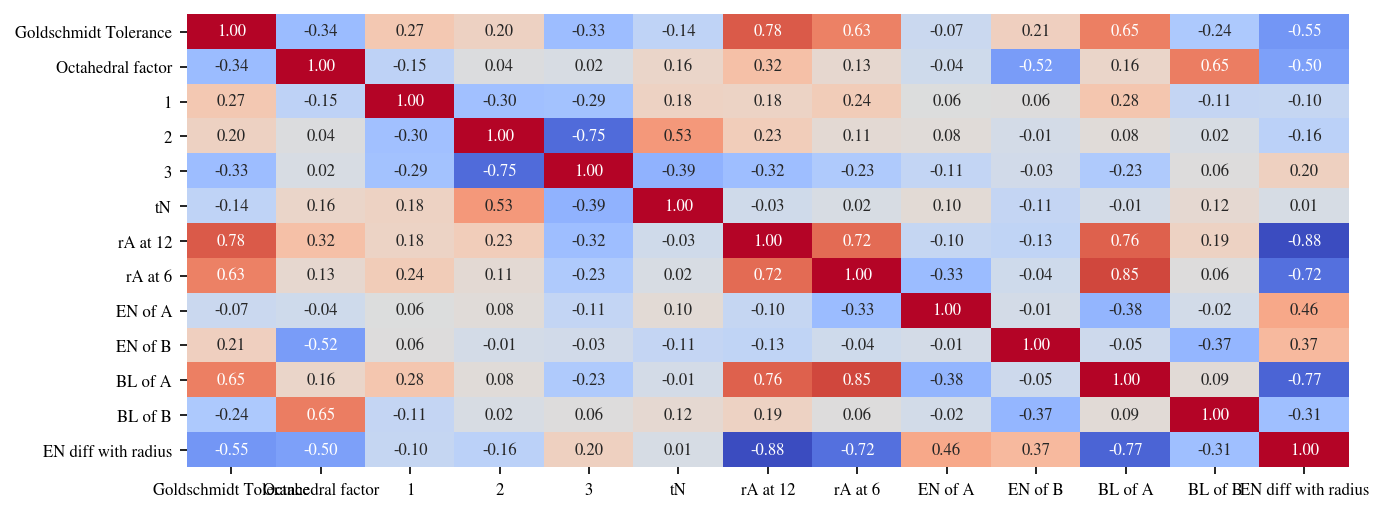

In [298]:
fig, ax = plt.subplots()
sns.heatmap(X.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal")

#plt.savefig('result.tif', bbox_inches='tight', pad_inches=0.0)

In [299]:
test['Lowest distortion'].value_counts()

1    362
0    261
2     33
3     19
Name: Lowest distortion, dtype: int64

In [300]:
categorical['Lowest distortion'].value_counts()

orthorhombic    362
cubic           261
rhombohedral     33
tetragonal       19
Name: Lowest distortion, dtype: int64

In [301]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [302]:
train_data = pd.concat([X_train, y_train], axis=1)

In [303]:
y_train.value_counts()

1    242
0    179
2     22
3      9
Name: Lowest distortion, dtype: int64

In [304]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

In [305]:
cubic = train_data[train_data['Lowest distortion']==0]
orthorhombic = train_data[train_data['Lowest distortion']==1]
rhombohedral = train_data[train_data['Lowest distortion']==2]
tetragonal= train_data[train_data['Lowest distortion']==3]

In [306]:
# upsample minority
rho_upsampled = resample(rhombohedral,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
tetra_upsampled = resample(tetragonal,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
cubic_upsampled = resample(cubic,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

In [307]:
upsampled = pd.concat([orthorhombic, rho_upsampled, cubic_upsampled, tetra_upsampled])

In [308]:
upsampled['Lowest distortion'].value_counts()

3    242
2    242
1    242
0    242
Name: Lowest distortion, dtype: int64

In [309]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [310]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [311]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [312]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

## SVM

In [553]:
model2.fit(X_new, y_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [554]:
model2.score(X_new,y_new)

0.5723140495867769

In [79]:
model2.score(X_test,y_test)

0.5650224215246636

In [80]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(X_test)
accuracy_score(preds,y_test)

0.5650224215246636

In [81]:
confusion_matrix(preds,y_test)

array([[53, 17,  2,  1],
       [12, 64,  2,  1],
       [16, 36,  5,  4],
       [ 1,  3,  2,  4]], dtype=int64)

In [82]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

In [83]:
pd.Series(preds).value_counts()

1    79
0    73
2    61
3    10
dtype: int64

In [84]:
# ACC should be above 463/731 which is 63.33%
# ACC should be above 764/1221 which is 62.57% IN the case of taking the values within TG and OF limits


#With valence
#acc=0.5636114911080712
#array([[266,  56,  21,   2],
 #      [125, 132,   9,   3],
  #     [ 45,  19,   8,   2],
   #    [ 27,   6,   4,   6]], dtype=int64)
    
#Without valence
#acc=0.5636114911080712

#array([[682, 118,  33,  11],
#       [144, 237,  28,   6],
#       [164, 114,  42,   0],
#       [ 88,  41,  10,  24]], dtype=int64)

#only real values
#acc=0.6285714285714286
#array([[ 3, 19,  1,  1],
 #      [ 2, 41,  2,  0],
  #     [ 0,  0,  0,  0],
    #   [ 0,  0,  1,  0]], dtype=int64)
    
#using VA/VB
#acc=0.5690834473324213
#array([[279,  56,  11,   2],
#       [ 84, 114,   8,   4],
#       [ 80,  27,  18,   2],
#       [ 20,  16,   5,   5]], dtype=int64)

#Using en and bl
#acc=0.5677154582763337

#using Va and VB
#acc=0.5622435020519836

#limits TG .6 to 1.1
        # OF .414 to .732
##acc within the limits =0.49303849303849306 and ignoring valencies
## taking valencies 0.5617173524150268
# 336/559 acc should be greater than this for valencies and and limits THAT is 60.1%

#One hot encoding decreased the acc to 0.5366726296958855

#limits TG .8 to 1.05
        # OF .414 to .732
    #acc=0.5870445344129555

## XGBoost

In [1364]:
model1=XGBClassifier(learning_rate=0.5)

In [1365]:
model1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [1366]:
#X_new

In [1367]:
#X_validation

In [1368]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

1.0

In [1369]:
model1.score(X_test,y_test)

0.7892376681614349

In [1370]:
preds = model1.predict(X_test)
accuracy_score(preds,y_test)

0.7892376681614349

In [1371]:
#model1.score(X_validation,y_validation)

In [1372]:
vals = model1.predict(X_validation)
accuracy_score(vals,y_validation)

0.36231884057971014

In [1320]:
#confusion_matrix(preds,y_test)

In [1267]:
pd.Series(vals).value_counts()

1    47
2    13
0     8
3     1
dtype: int64

In [1216]:
confusion_matrix(vals,y_validation)

array([[ 2,  6,  0,  0],
       [ 7, 22,  1, 17],
       [ 2,  2,  3,  6],
       [ 1,  0,  0,  0]], dtype=int64)

In [85]:
y_validation.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

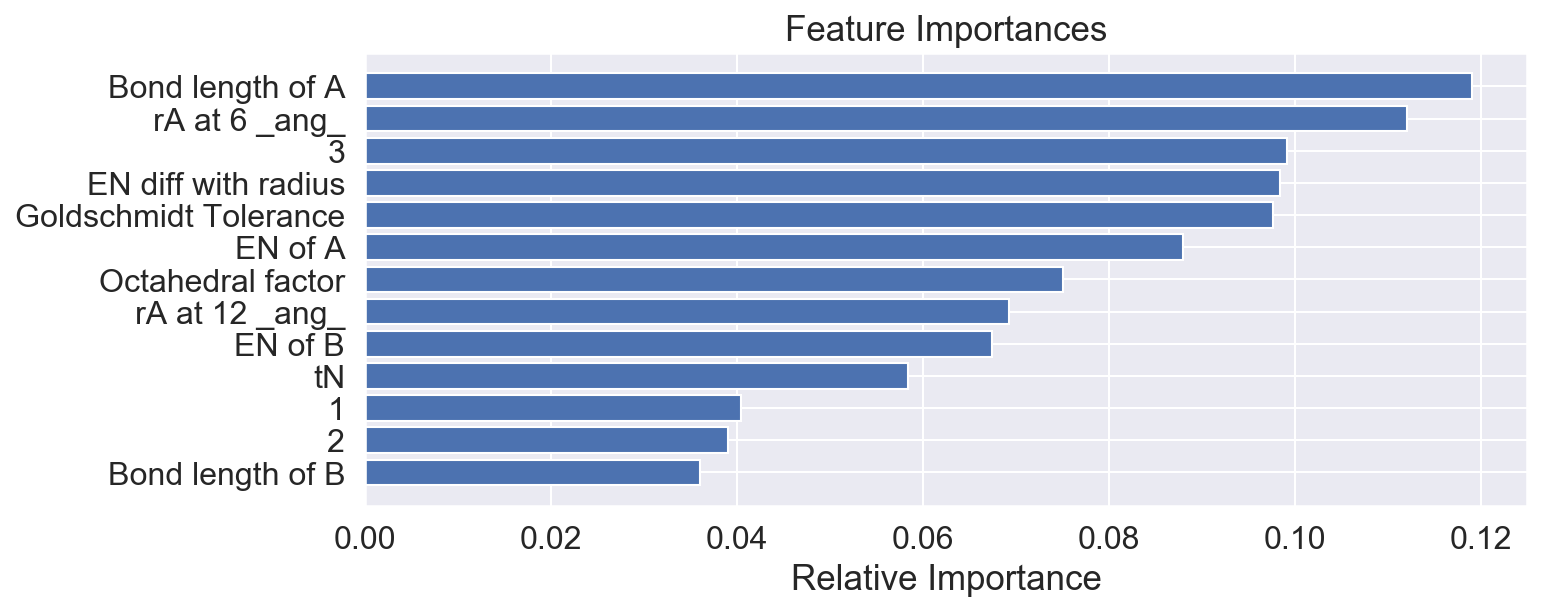

In [86]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [194]:
#acc with only valence A = 0.6607387140902873
#array([[327,  48,   7,   0],
#       [ 74, 121,   8,   0],
#       [ 38,  27,  25,   3],
#       [ 24,  17,   2,  10]], dtype=int64)

#using VA/VB
#0.6566347469220246

#Without taking the valencies 
#acc=0.6061997703788748

# New tolerance factor performs better than tR
##takin en and bl
#acc=0.7209302325581395

#VA/VB and Valence B do not have any effect

# VA and VB also have no effect in the prediction and rB at 6 also has no effect
#acc=0.719562243502052

#limits TG .6 to 1.1
        # OF .414 to .732
## When taking the limits acc fell to 0.6920556920556921 and ignoring valencies
# limits and valencies gives highest acc yet 0.7638640429338104

# on hot enconding on valence A gives best acc yet =0.7656529516994633 this is in additional to the limits and removing empty valence values
# introducing EN diff gives acc=0.7692307692307693
#taking en diff with with radius multiplied increased the acc to = 0.774597495527728

#when

## Decision Tree

In [77]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [78]:
model3.score(X_test,y_test)

0.7316636851520573

In [79]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.7316636851520573

In [80]:
confusion_matrix(preds,y_test)

array([[292,  64,   9,   3],
       [ 37, 102,  11,   2],
       [  7,   8,  10,   1],
       [  0,   6,   2,   5]], dtype=int64)

In [81]:
pd.Series(preds).value_counts()

0    368
1    152
2     26
3     13
dtype: int64

## Random Forest

In [82]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [83]:
model4.score(X_test,y_test)

0.7942754919499105

In [84]:
accuracy_score(preds,y_test)

0.7316636851520573

In [85]:
confusion_matrix(preds,y_test)

array([[292,  64,   9,   3],
       [ 37, 102,  11,   2],
       [  7,   8,  10,   1],
       [  0,   6,   2,   5]], dtype=int64)

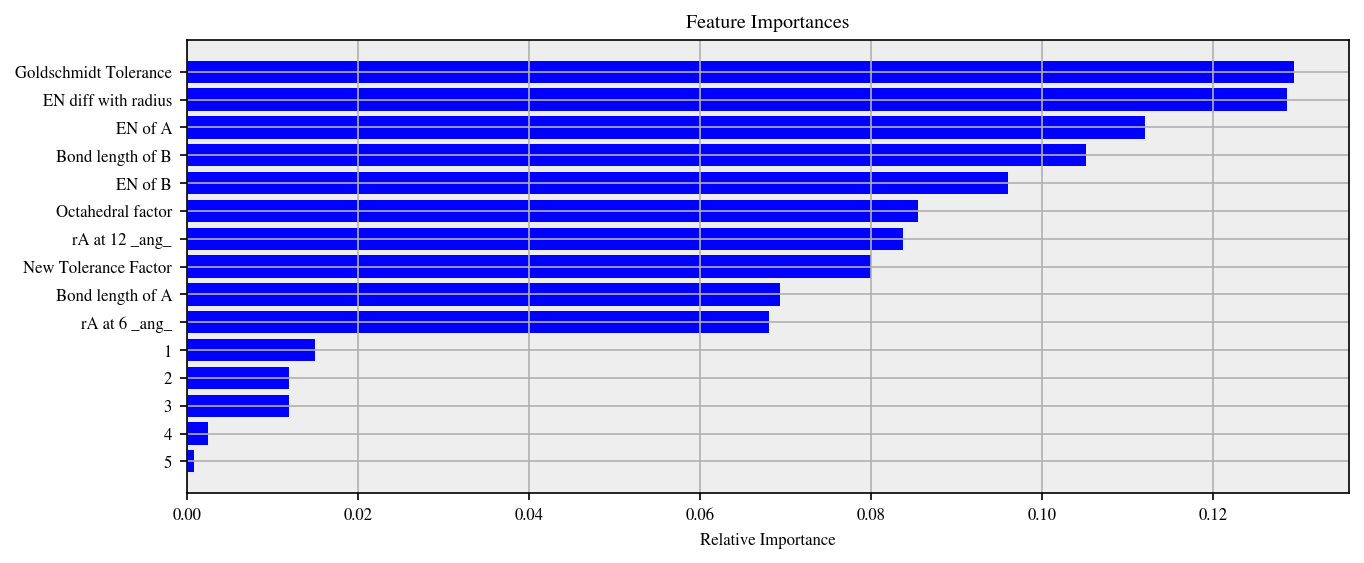

In [86]:
features = X_new.columns
importances = model4.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [87]:
importances

array([0.12942426, 0.08548223, 0.0149863 , 0.01192383, 0.01192289,
       0.00245869, 0.00085624, 0.08369421, 0.06807075, 0.11204962,
       0.0960337 , 0.06938158, 0.10508388, 0.08005142, 0.1285804 ])

In [88]:
#with both valence a and b
#0.7113543091655267
#array([[381,  71,  10,   4],
#       [ 64, 113,   9,   3],
#       [ 13,  21,  22,   2],
#       [  5,   8,   1,   4]], dtype=int64)

#without valence B
#unchanged.

#Using VA/VB
#0.7099863201094391

#using en and bl
#acc=0.7346101231190151




## Using LightGBM as a classifier

In [2]:
#import lightgbm as lgb# Default gradient boosting machine classifier
#model = lgb.LGBMClassifier(importance_type='gain',n_estimators=500)
#model

In [313]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=500,importance_type='gain')

In [314]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [315]:
model.fit(X_new, y_new)
model.score(X_new,y_new)

1.0

In [316]:
model.score(X_test,y_test)

0.8071748878923767

In [317]:
#X_validation

In [318]:
model.score(X_validation,y_validation)

0.4084507042253521

In [319]:
#preds = model.predict(X_test)
#accuracy_score(preds,y_test)

In [320]:
vals = model.predict(X_validation)
accuracy_score(vals,y_validation)

0.4084507042253521

In [321]:
s=pd.Series(vals,name='Predicted structure')
s.to_frame()

,Predicted structure
0,1
1,1
2,1
3,1
4,2
...,...
66,1
67,1
68,1
69,0


In [322]:
val2=val[['Compound','Crystal structure']]

In [323]:
val2

,Compound,Crystal structure
0,LaZn1/2Ti1/2O3,1
1,Na1/2K1/2NbO3,1
2,Na1/2Bi1/2TiO3,2
3,Na1/2Bi1/2ZrO3,1
4,K1/2Bi1/2TiO3,3
...,...,...
66,Pr(Zn1/2Ti1/2)O3,1
67,Gd(Zn1/2Ti1/2)O3,1
68,Tb(Zn1/2Ti1/2)O3,1
69,Dy(Zn1/2Ti1/2)O3,1


In [324]:
result=pd.concat([val2,s],axis=1)

In [325]:
result

,Compound,Crystal structure,Predicted structure
0,LaZn1/2Ti1/2O3,1,1
1,Na1/2K1/2NbO3,1,1
2,Na1/2Bi1/2TiO3,2,1
3,Na1/2Bi1/2ZrO3,1,1
4,K1/2Bi1/2TiO3,3,2
...,...,...,...
66,Pr(Zn1/2Ti1/2)O3,1,1
67,Gd(Zn1/2Ti1/2)O3,1,1
68,Tb(Zn1/2Ti1/2)O3,1,1
69,Dy(Zn1/2Ti1/2)O3,1,0


In [326]:
result['Crystal structure'] = le_target.inverse_transform(result['Crystal structure'])

In [327]:
result['Predicted structure'] = le_target.inverse_transform(result['Predicted structure'])

In [328]:
result

,Compound,Crystal structure,Predicted structure
0,LaZn1/2Ti1/2O3,orthorhombic,orthorhombic
1,Na1/2K1/2NbO3,orthorhombic,orthorhombic
2,Na1/2Bi1/2TiO3,rhombohedral,orthorhombic
3,Na1/2Bi1/2ZrO3,orthorhombic,orthorhombic
4,K1/2Bi1/2TiO3,tetragonal,rhombohedral
...,...,...,...
66,Pr(Zn1/2Ti1/2)O3,orthorhombic,orthorhombic
67,Gd(Zn1/2Ti1/2)O3,orthorhombic,orthorhombic
68,Tb(Zn1/2Ti1/2)O3,orthorhombic,orthorhombic
69,Dy(Zn1/2Ti1/2)O3,orthorhombic,cubic


In [329]:
result.to_csv('predicted val.csv')

In [330]:
pd.Series(vals).value_counts()

1    59
0     8
2     4
dtype: int64

In [331]:
confusion_matrix(vals,y_validation)

array([[ 2,  6,  0,  0],
       [ 8, 26,  3, 22],
       [ 2,  0,  1,  1],
       [ 0,  0,  0,  0]], dtype=int64)

In [332]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh

In [333]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

In [334]:
y_validation.value_counts()

1    32
3    23
0    12
2     4
Name: Crystal structure, dtype: int64

In [335]:
#array = confusion_matrix(preds,y_test)

#df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
#plt.title('Confusion Matrix')
#sns.set(font_scale=1.4) # for label size
#df_cm = pd.DataFrame(array, index=["Predicted cubic", "Predicted orthorhombic", "Predicted rhombohedral", "Predicted tetragonal"], columns=["True cubic", "True orthorhombic", "True rhombohedral", "True tetragonal"])
#sns.heatmap(df_cm,cmap="PuRd",fmt = '.2f', annot=True, annot_kws={"size": 16}) # font size
#plt.savefig('confusion_matrix.tif', bbox_inches='tight', pad_inches=2.0)
#plt.show()

In [336]:
#confusion_matrix(preds,y_test)

In [337]:
#vals

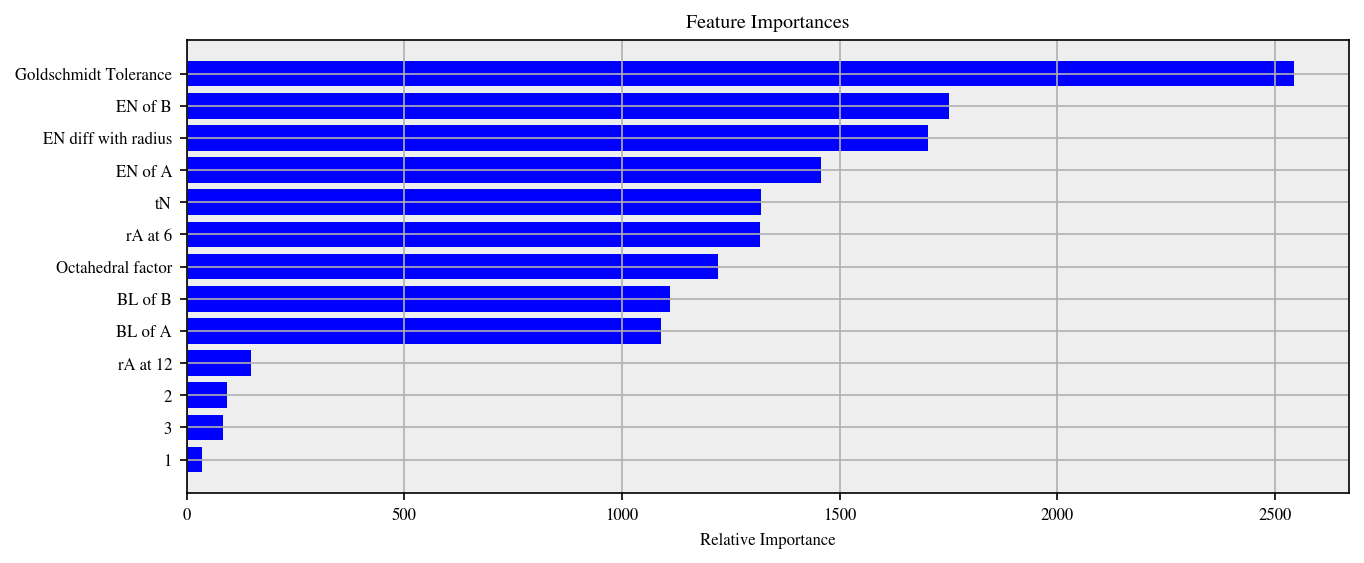

In [338]:
features = X_new.columns
importances = model.booster_.feature_importance(importance_type='gain')
indices = np.argsort(importances)


#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

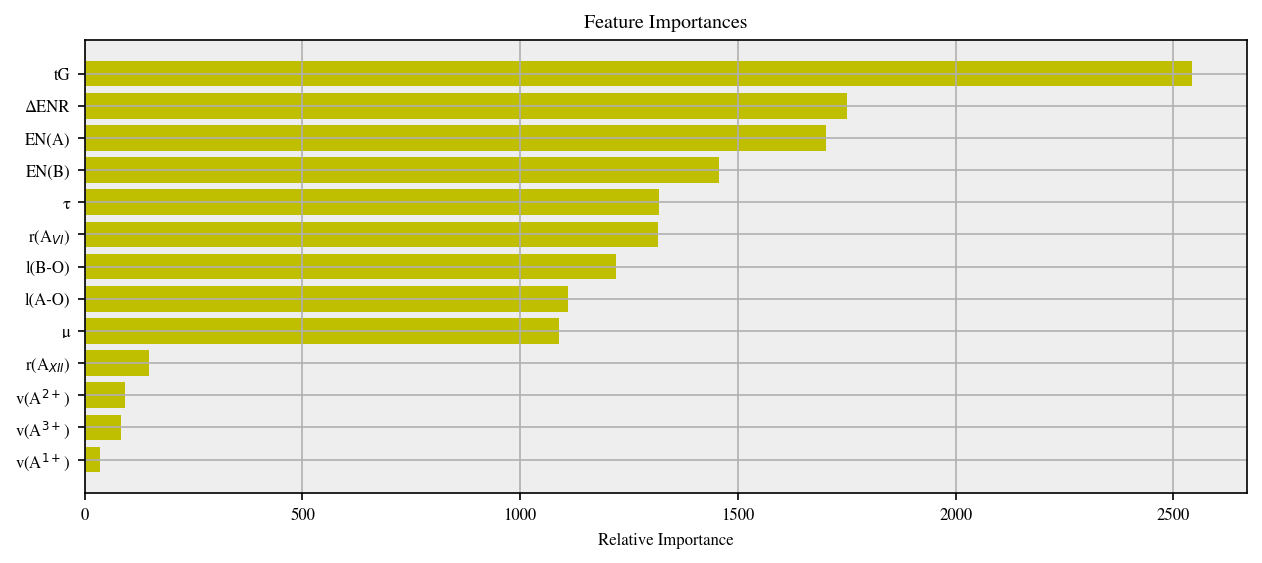

In [339]:
features = X_new.columns
importances = model.booster_.feature_importance(importance_type='gain')
indices = np.argsort(importances)

l=['v(A$^{1+}$)','v(A$^{3+}$)','v(A$^{2+}$)','r(A$_{XII}$)','μ','l(A-O)','l(B-O)','r(A$_{VI}$)','τ','EN(B)','EN(A)','ΔENR','tG']
#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(13), importances[indices], color='y', align='center')
plt.yticks(range(13), [i for i in l])
plt.xlabel('Relative Importance')
plt.savefig('relative_2.tif', bbox_inches='tight', pad_inches=2.0)
plt.show()


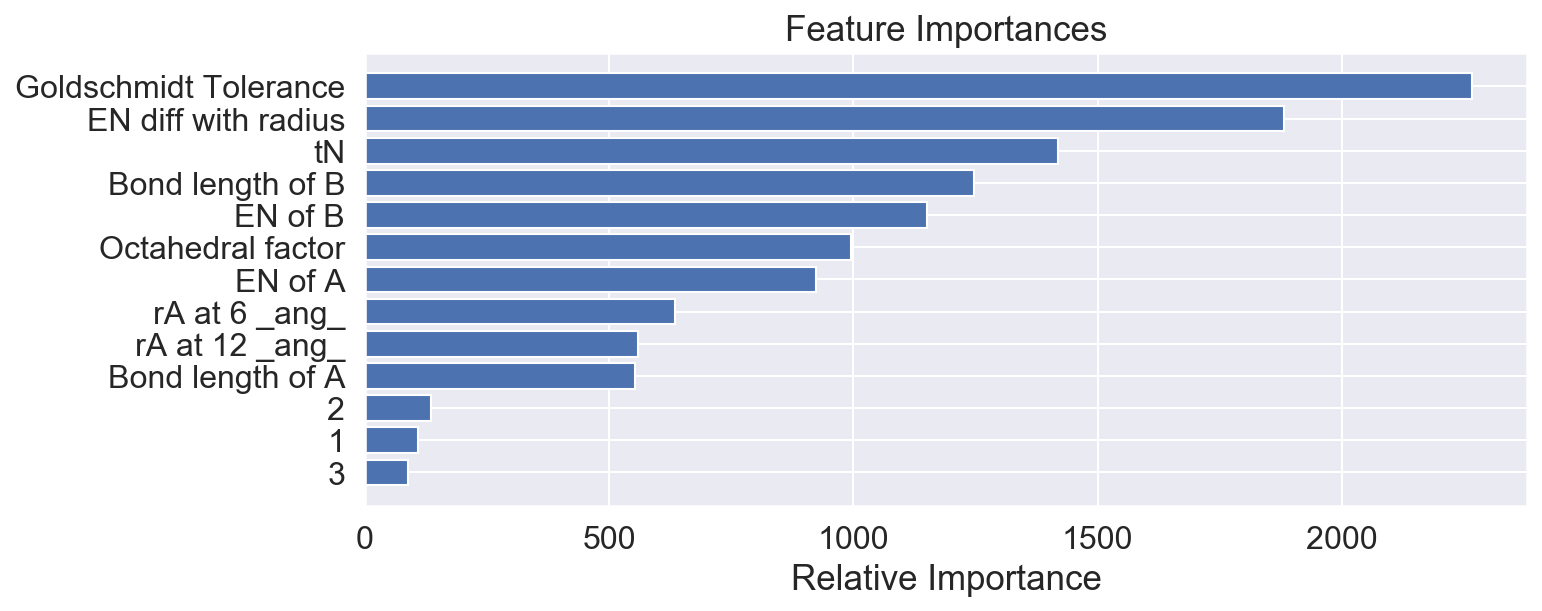

In [158]:
features = X_new.columns
importances=model.booster_.feature_importance(importance_type='split')
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [183]:
# acc= 0.7889087656529516
#When we did not take valencies into account and took 3430 datapoints
#acc=0.7632508833922261

#On dropping rA at 6
#acc=0.7817531305903399

#On dropping 4 and 5
#acc=0.7960644007155635

#tg .82-1.1 and using tN
#acc=0.7847533632286996

#When using tN less than 4.18
#acc falls to 73%

## When using gain for feature importance

In [184]:
# Goldschmidt Tolerance
# EN diff with radius
# EN of A
# EN of B
# tN

## When using split for feature importance

In [97]:
# EN diff with radius
# Goldschmidt Tolerance
# Bond Length of B
# EN of B
# EN of A

## Using Plotly to visualize clusters

In [103]:
#import plotly
#import plotly.express as px

In [121]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['Goldschmidt Tolerance'],z=wp1['tN'],color=categorical['Lowest distortion'])
#ig.show()

In [122]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['Goldschmidt Tolerance'],z=wp1['EN of B'],color=categorical['Lowest distortion'])
#fig.show()

In [123]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['Goldschmidt Tolerance'],z=wp1['EN of A'],color=categorical['Lowest distortion'])
#fig.show()

In [124]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['EN of B'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [125]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['EN of A'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [126]:
#fig = px.scatter_3d(x=wp1['EN of B'], y=wp1['Goldschmidt Tolerance'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [127]:
#fig = px.scatter_3d(x=wp1['EN of A'], y=wp1['Goldschmidt Tolerance'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [128]:
#fig = px.scatter_3d(x=wp1['EN of A'], y=wp1['EN of B'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [129]:
#fig = px.scatter_3d(x=wp1['EN of A'], y=wp1['Goldschmidt Tolerance'],z=wp1['EN of B'],color=categorical['Lowest distortion'])
#fig.show()

In [130]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['EN of A'],z=wp1['EN of B'],color=categorical['Lowest distortion'])
#fig.show()

In [109]:
#truedf=wp1[wp1['In literature']==True]

In [110]:
#true_categorical=categorical[categorical['In literature']==True]

In [111]:
#categorical

In [112]:
#true_categorical

In [113]:
#fig = px.scatter_3d(x=truedf['EN diff with radius'], y=truedf['EN of A'],z=truedf['EN of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [114]:
#fig = px.scatter_3d(x=truedf['EN of A'], y=truedf['Goldschmidt Tolerance'],z=truedf['EN of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [115]:
#fig = px.scatter_3d(x=truedf['EN of A'], y=truedf['EN of B'],z=truedf['Bond length of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [116]:
#fig = px.scatter_3d(x=truedf['EN of A'], y=truedf['Goldschmidt Tolerance'],z=truedf['Bond length of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [85]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_new)
#shap.summary_plot(shap_values, X_new)

## SHAP summary plot for each crystal structure

In [162]:
#Cubic

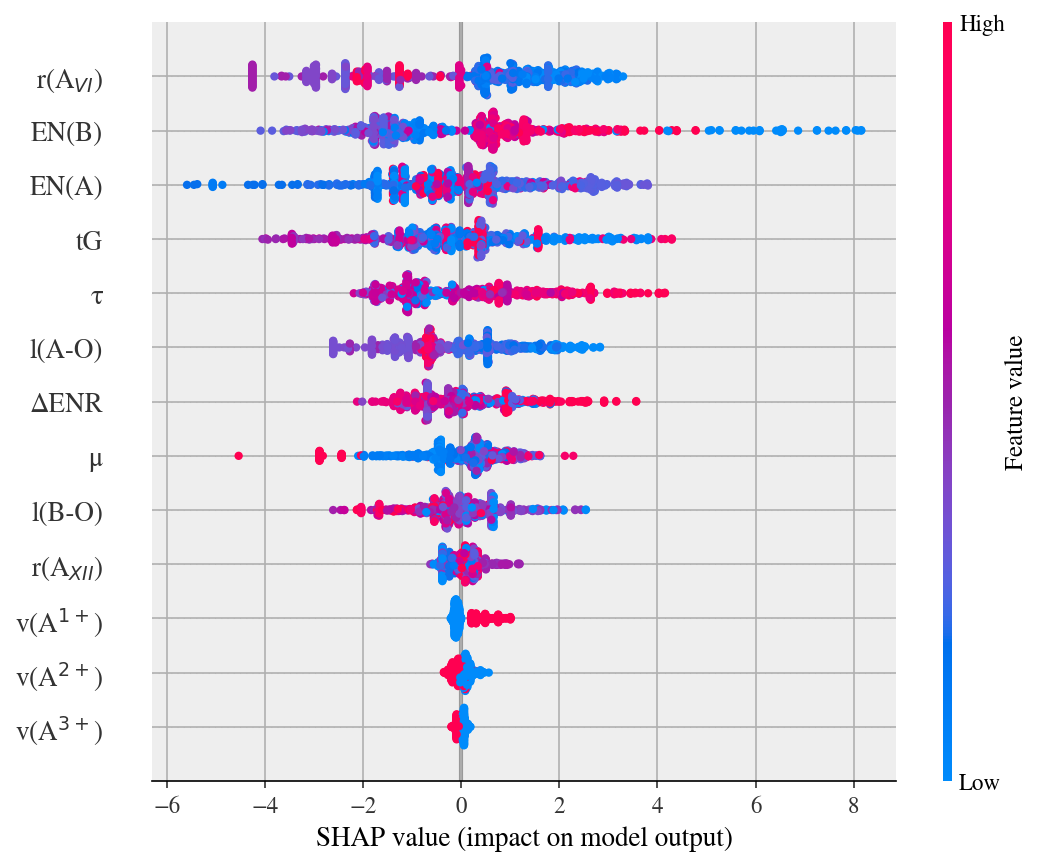

In [102]:
shap.summary_plot(shap_values[0], X_new, show=False)
plt.savefig('cubic.tif', bbox_inches='tight', pad_inches=1.0)

In [389]:
# Orthorhombic

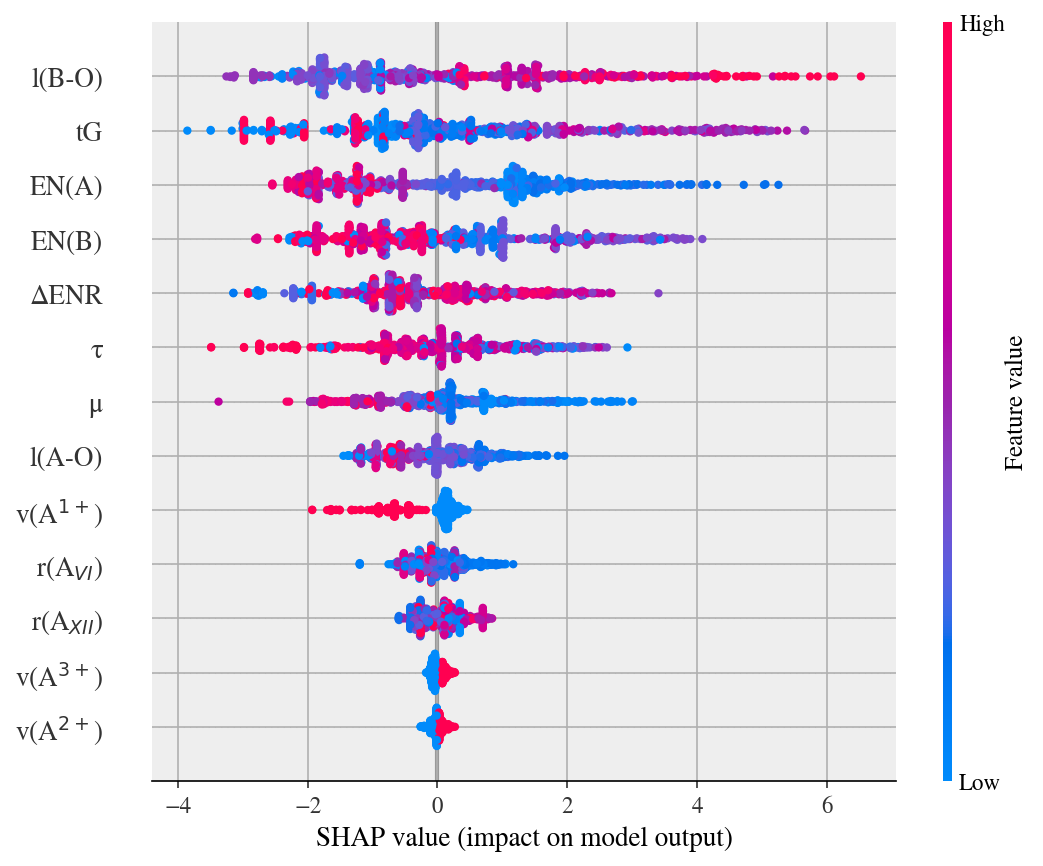

In [103]:
shap.summary_plot(shap_values[1], X_new,show=False)
plt.savefig('orthorhombic.tif', bbox_inches='tight', pad_inches=1.0)

In [391]:
# Rhombohedral

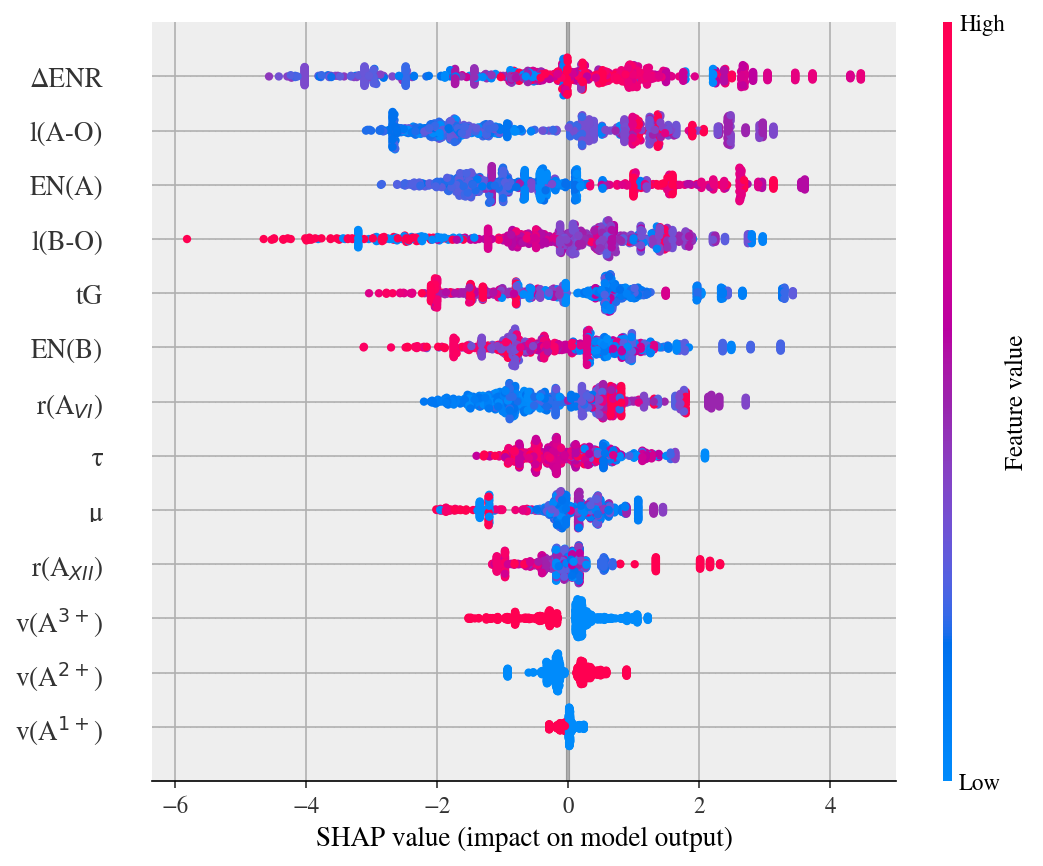

In [104]:
shap.summary_plot(shap_values[2], X_new, show=False)
plt.savefig('rhombohedral.tif', bbox_inches='tight', pad_inches=1.0)

In [393]:
# Tetragonal

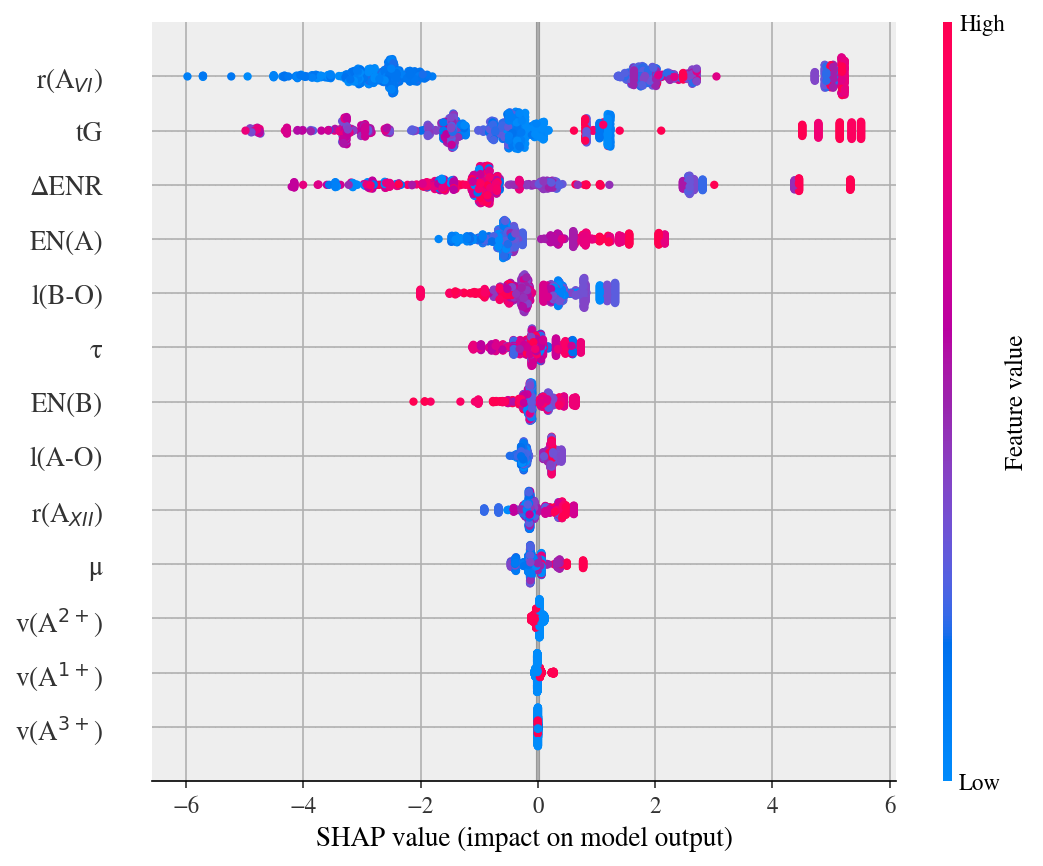

In [105]:
shap.summary_plot(shap_values[3], X_new,show=False)
plt.savefig('tetragonal.tif', bbox_inches='tight', pad_inches=1.0)

## SHAP dependence graph for top variables

### For Cubic

In [136]:
#shap.dependence_plot('EN diff with radius', shap_values[0], X_new)

In [137]:
#shap.dependence_plot('EN of A', shap_values[0], X_new)

In [138]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[0], X_new)

In [139]:
#shap.dependence_plot('EN of B', shap_values[0], X_new)

In [140]:
#shap.dependence_plot('Bond length of B', shap_values[0], X_new)

## For Orthorhombic

In [141]:
#shap.dependence_plot('EN diff with radius', shap_values[1], X_new)

In [142]:
#shap.dependence_plot('EN of A', shap_values[1], X_new)

In [144]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[1], X_new)

In [145]:
#shap.dependence_plot('EN of B', shap_values[1], X_new)

In [146]:
#shap.dependence_plot('Bond length of B', shap_values[1], X_new)

## For Rhombohedral

In [147]:
#shap.dependence_plot('EN diff with radius', shap_values[2], X_new)

In [148]:
#shap.dependence_plot('EN of A', shap_values[2], X_new)

In [149]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[2], X_new)

In [150]:
#shap.dependence_plot('EN of B', shap_values[2], X_new)

In [151]:
#shap.dependence_plot('Bond length of B', shap_values[2], X_new)

## For Tetragonal

In [152]:
#shap.dependence_plot('EN diff with radius', shap_values[3], X_new)

In [153]:
#shap.dependence_plot('EN of A', shap_values[3], X_new)

In [154]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[3], X_new)

In [155]:
#shap.dependence_plot('EN of B', shap_values[3], X_new)

In [156]:
#shap.dependence_plot('Bond length of B', shap_values[3], X_new)